In [1]:
import pandas as pd

In [3]:
A = pd.read_csv(r"C:\Users\APURV\Downloads\airquality.csv")

In [4]:
A.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5


In [6]:
A = A.drop(['Unnamed: 0'],axis = 1)

In [7]:
A.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [8]:
meanOzone = A[['Ozone']].mean()

In [11]:
meanSolar = A[['Solar.R']].mean()

In [17]:
A[["Ozone"]]=A[["Ozone"]].fillna(value=meanOzone)

In [15]:
A[["Solar.R"]]=A[["Solar.R"]].fillna(value=meanSolar)

In [18]:
A.isnull().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [20]:
subset1 = A.loc[0:5,['Ozone']]
subset2 = A.loc[0:10,['Ozone']]

In [21]:
subset1.shape

(6, 1)

In [22]:
subset2.shape

(11, 1)

In [23]:
merge=subset2.merge(subset1)

In [24]:
merge.shape

(7, 1)

In [25]:
from sklearn import preprocessing

In [27]:
#le = preprocessing.LabelEncoder()
#Label_encoded = A.copy()
#label_encoded['humidity'] = le.fit_transform(Label_encoded['humidity'])

In [28]:
X = A[['Ozone']]
Y = A[['Temp']]

In [29]:
X.head(5)

,Ozone
0,41.00000
1,36.00000
2,12.00000
3,18.00000
4,42.12931


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

In [31]:
X_train.shape

(122, 1)

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [33]:
model = lr.fit(X_train,Y_train)

In [35]:
Y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,Y_pred)
print(mse)

57.431575994486344


In [38]:
from sklearn.metrics import mean_absolute_error
mse = mean_absolute_error(Y_test,Y_pred)
print(mse)

5.726293156128188


In [39]:
import math
rmse = math.sqrt(mse)
print(rmse)

2.392967437331354


In [40]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,Y_pred)
print(r2)

0.39627048797062525


In [43]:
n = len(Y_test)
k = X.shape[1]
adj_r2 = 1-(((1-r2))*(n-1)/(n-k-1))
print(adj_r2)

0.37545222893512953


In [46]:
import matplotlib.pyplot as plt

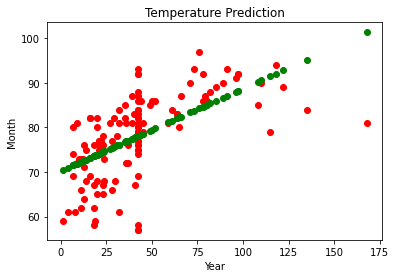

In [47]:
plt.scatter(X_train,Y_train,color="red")
plt.title("Temperature Prediction")
plt.xlabel("Year")
plt.ylabel("Month")
plt.scatter(X_train,model.predict(X_train),color="green")